In [30]:
# Import your libraries
import glob
import cv2
import os

#For data management
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler


#import classifiers
from sklearn.svm import SVC
from sklearn import svm

#metrics contain our plot_confusion_matrix and classification_report
from sklearn import metrics

#helper function to splitting data
from sklearn.model_selection import train_test_split, cross_val_score

#for plotting
import matplotlib.pyplot as plt
%matplotlib inline


#export model
import pickle

In [5]:
fruit_images = []
labels = [] 

#Retrieve images from the folders -- fruit labels are the name of the image file
for fruit_dir_path in glob.glob("./fruits-360/Training/*"):
    #for windows, to extract the fruit label from image file name
    fruit_label = fruit_dir_path.split("\\")[-1]
    

    for image_path in glob.glob(os.path.join(fruit_dir_path, "*.jpg")):
   
        
        #read image
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)

        
        #resizing image to be 45x45
        image = cv2.resize(image, (45, 45))

        #convert color space
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        #append the image of fruit to the fruit array
        fruit_images.append(image)
        #append the name of the fruit
        labels.append(fruit_label)
        

fruit_images = np.array(fruit_images)
labels = np.array(labels)

In [14]:
#creating a dictionary of fruit labels to their corresponding number (ID)
label_to_id_dict = {v:i for i,v in enumerate(np.unique(labels))}

#creating a dictionary of numbers (ID) to their corresponding for labels
id_to_label_dict = {v:k for k, v in label_to_id_dict.items()}

#turn our dataset of current labels into their corresponding ID numbers
labelIDs = np.array([label_to_id_dict[x] for x in labels])


In [15]:
#sanity check
id_to_label_dict

{0: 'Apple Braeburn',
 1: 'Apple Crimson Snow',
 2: 'Apple Golden 1',
 3: 'Apple Golden 2',
 4: 'Apple Golden 3',
 5: 'Apple Granny Smith',
 6: 'Apple Pink Lady',
 7: 'Apple Red 1',
 8: 'Apple Red 2',
 9: 'Apple Red 3',
 10: 'Apple Red Delicious',
 11: 'Apple Red Yellow 1',
 12: 'Apple Red Yellow 2',
 13: 'Apricot',
 14: 'Avocado',
 15: 'Avocado ripe',
 16: 'Banana',
 17: 'Banana Lady Finger',
 18: 'Banana Red',
 19: 'Beetroot',
 20: 'Blueberry',
 21: 'Cactus fruit',
 22: 'Cantaloupe 1',
 23: 'Cantaloupe 2',
 24: 'Carambula',
 25: 'Cauliflower',
 26: 'Cherry 1',
 27: 'Cherry 2',
 28: 'Cherry Rainier',
 29: 'Cherry Wax Black',
 30: 'Cherry Wax Red',
 31: 'Cherry Wax Yellow',
 32: 'Chestnut',
 33: 'Clementine',
 34: 'Cocos',
 35: 'Corn',
 36: 'Corn Husk',
 37: 'Cucumber Ripe',
 38: 'Cucumber Ripe 2',
 39: 'Dates',
 40: 'Eggplant',
 41: 'Fig',
 42: 'Ginger Root',
 43: 'Granadilla',
 44: 'Grape Blue',
 45: 'Grape Pink',
 46: 'Grape White',
 47: 'Grape White 2',
 48: 'Grape White 3',
 49: '

In [16]:
#flattening our fruit images
images_scaled = StandardScaler().fit_transform([i.flatten() for i in fruit_images])

#splitting our training data between training and testing
X_train, X_test, y_train, y_test = train_test_split(images_scaled, labelIDs, test_size =0.25, random_state=42)

#initialize our model
model = svm.SVC()

#fit our model
model.fit(X_train, y_train)

SVC()

In [17]:
#10:52 start fit, fit finished at 
#

#accuracy of predictions using our test data
accuracy = model.score(X_test, y_test)


print("Accuracy %f" % accuracy)

Accuracy 0.998818


In [18]:
#make new predictions using our test data
y_pred = model.predict(X_test)
y_pred

array([ 43, 130,  94, ..., 102,  84, 100])

In [19]:
#print classification report
print(metrics.classification_report(y_true = y_test, y_pred = y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       126
           1       1.00      1.00      1.00       112
           2       1.00      1.00      1.00       127
           3       1.00      1.00      1.00       127
           4       1.00      1.00      1.00       108
           5       1.00      1.00      1.00       113
           6       1.00      1.00      1.00       121
           7       1.00      1.00      1.00       108
           8       1.00      1.00      1.00       120
           9       1.00      1.00      1.00        96
          10       1.00      1.00      1.00       120
          11       1.00      1.00      1.00       111
          12       1.00      1.00      1.00       159
          13       1.00      1.00      1.00       115
          14       1.00      1.00      1.00       120
          15       1.00      1.00      1.00       131
          16       1.00      0.99      1.00       106
          17       0.91    

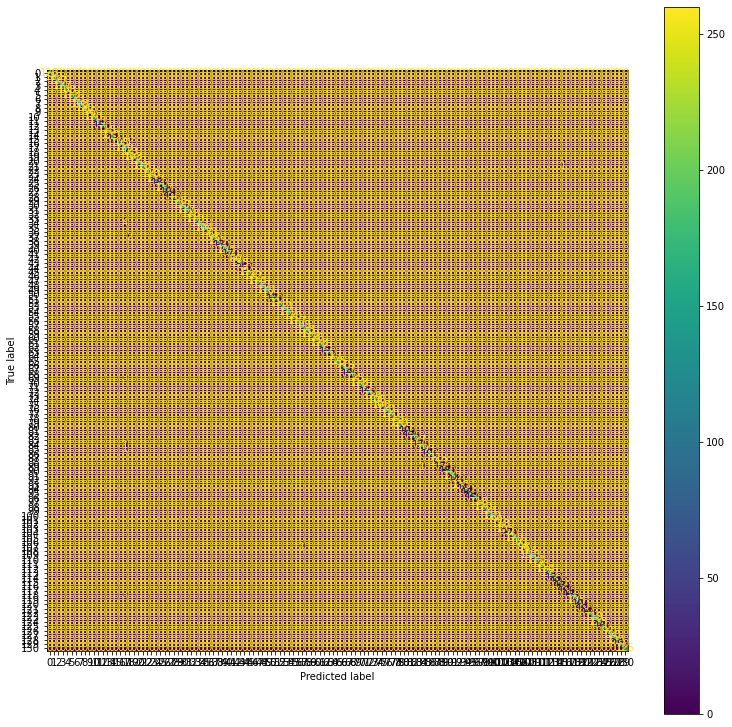

In [24]:
#plot confusion matrix of our predicted results
fig, ax = plt.subplots(figsize = (13,13))
metrics.plot_confusion_matrix(estimator=model,
                             X=X_test,
                             y_true=y_test,
                             ax=ax)

In [34]:
filename = 'SVM_fruitTree.pkl'
pickle.dump(model, open(filename, 'wb'))

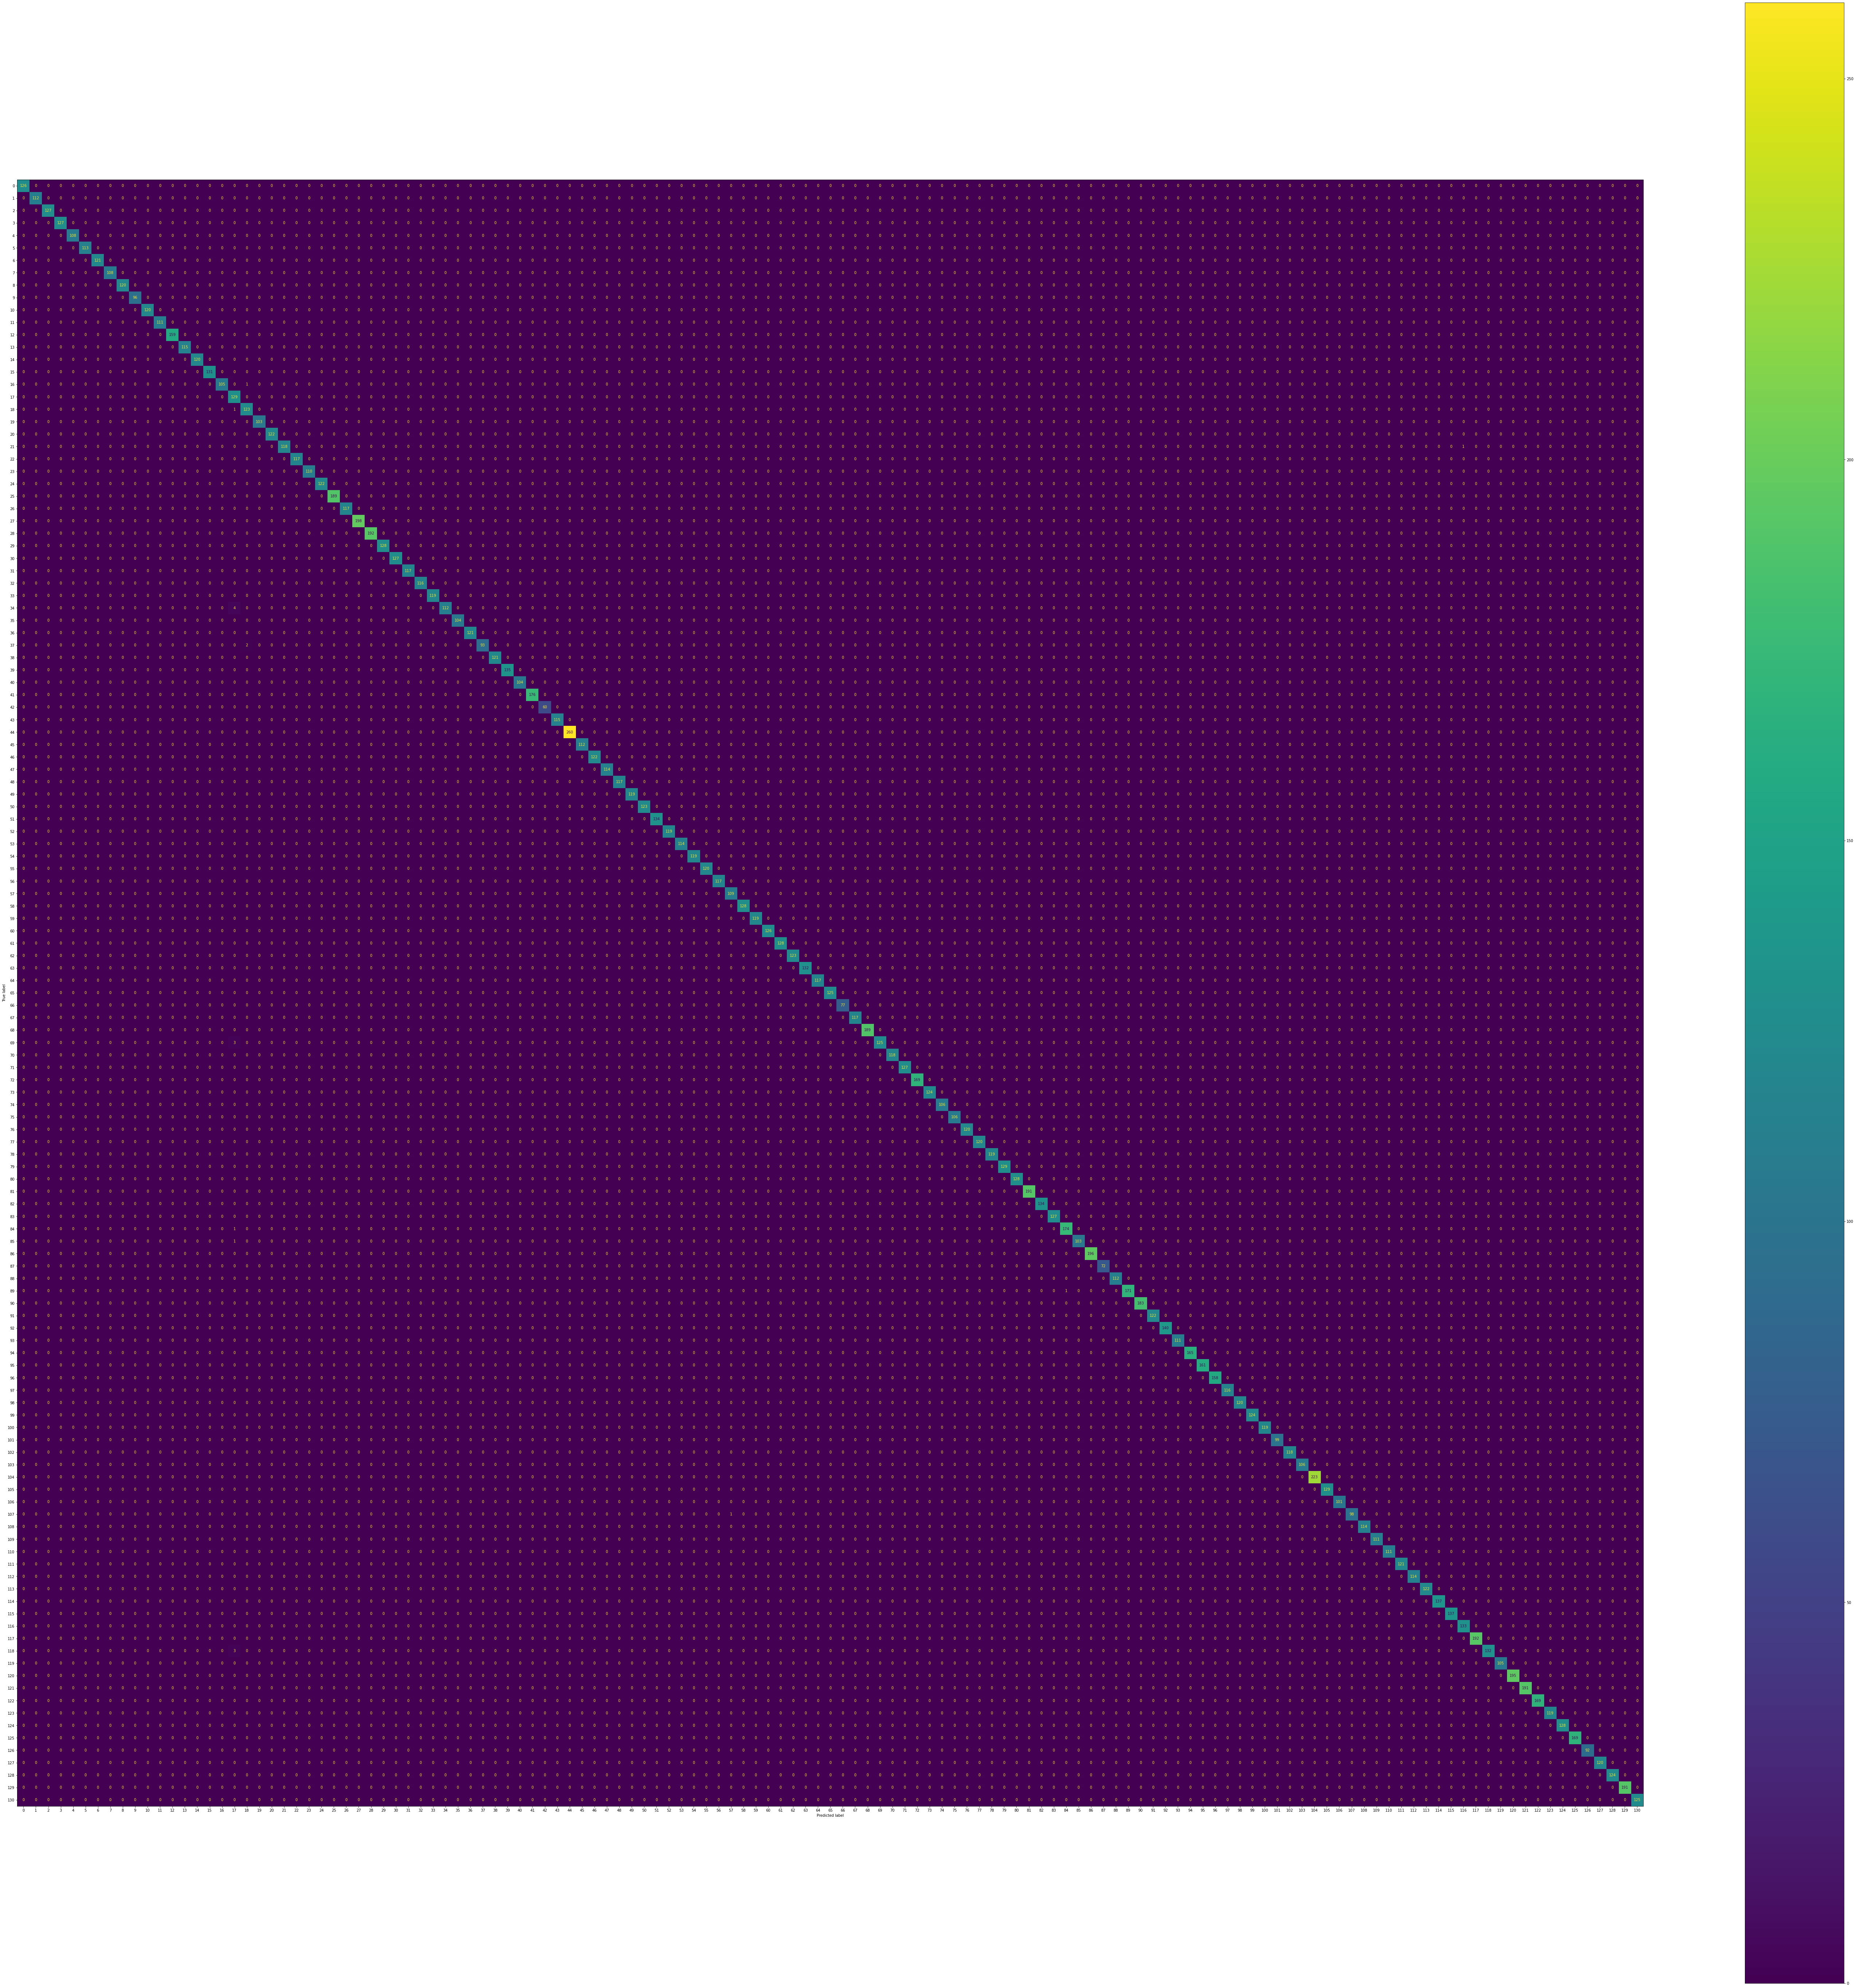

In [29]:
fig, ax = plt.subplots(figsize = (100,100))
metrics.plot_confusion_matrix(estimator=model,
                             X=X_test,
                             y_true=y_test,
                             ax=ax)

In [33]:
pred_kfold = cross_val_score(model, images_scaled, labelIDs, cv=5) 
print("Accuracy with SVM and K-FOLD CROSS VALIDATION: %0.2f (+/- %0.2f)" % (pred_kfold.mean(), pred_kfold.std() * 2))

KeyboardInterrupt: 

In [ ]:
image_test_path= "F:\DesktopFiles_Desktop\CTP_DS_2021Spring\Project\FruitTree\CTPSpring2021_DataScience_Proj\fruits-360\Test\Apple Crimson Snow\80_100.jpg"
image = cv2.imread(image_test_path, cv2.IMREAD_COLOR)